##Simulating sky images, injecting gaussian sources
####Written by Sergio Hernandez Charpak
####13/06/2016

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import cv2

Populating the interactive namespace from numpy and matplotlib


In [2]:
path_images = './Images/withGaussianSources/'
noise_background = 50

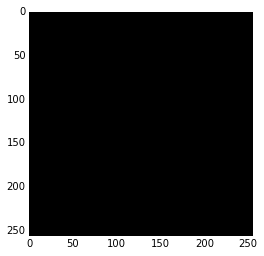

In [3]:
#Generates a black image
width = 255
height = 255
blank_image = np.zeros((height,width), np.uint8)
cv2.imwrite(path_images+'blackImage.jpg', blank_image) 
plt.imshow(blank_image, cmap="Greys_r")

In [4]:
#Function to make the histogram of an image given the number of bins and the image
def make_histogram(image, bins):
    hist, bins = np.histogram(image.ravel(),bins=bins)
    n_bins = np.zeros(len(hist))
    for i in range(len(hist)):
        n_bins[i] = (bins[i]+bins[i+1])/2.0
    fig = plt.figure(figsize = (8,8))
    plt.step( n_bins,hist,linewidth=3 )
    plt.xlabel("Gray scale level", fontsize=20)
    plt.ylabel("Number of pixels", fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.grid()
    plt.title("Histogram of the simulated,\n source with noise", fontsize=20)
    #Uncomment to save as png
    #plt.savefig("path_images+'histogram_new.png",format = "png")

In [5]:
#Function to make a row x col gaussian white noise with given std
def gaussian_white_noise(row,col,std):
    mean = 0
    gauss_noise = np.random.normal(mean, std, (row,col))
    gauss_noise = gauss_noise.reshape(row, col)
    return gauss_noise

In [6]:
# Auxiliary functions to calculate create gaussians
def gaussian(x, mu, sigma):
    return exp( -(((x-mu)/(sigma))**2)/2.0 )

def get_gaussian(kernel_radius, sigma):
    hkernel = [gaussian(x, kernel_radius, sigma) for x in range(2*kernel_radius+1)]
    vkernel = [x for x in hkernel]
    kernel2d = [[xh*xv for xh in hkernel] for xv in vkernel]
    kernelsum = sum([sum(row) for row in kernel2d])
    kernel2d = [[x/kernelsum for x in row] for row in kernel2d]
    return array(kernel2d)


In [7]:
#Function which injects a gaussian source with noise in a given image
def inject_noisy_gaussian_source(image, x,y, size, std_noise, std_source, amplitude_source):
    gauss_noise = gaussian_white_noise(size,size,std_noise)
    radius = int(size/2)
    #gaussian = get_gaussian(2, 1.)
    gaussian = get_gaussian(radius, std_source)
    gaussian = gaussian*amplitude_source
    gaussian_plus_noise = gaussian + gauss_noise
    i_ini, j_ini = int(x-size/2),int(y-size/2)
    for i in range (size):
        for j in range (size):
            image[i_ini + i, j_ini + j] = image[i_ini + i, j_ini + j] + gaussian_plus_noise[i,j]
    return image

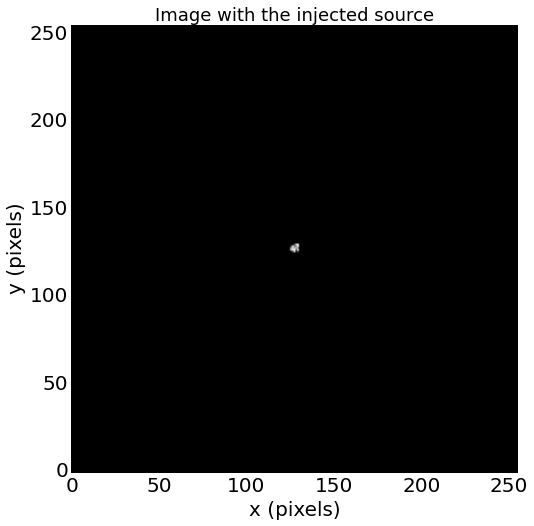

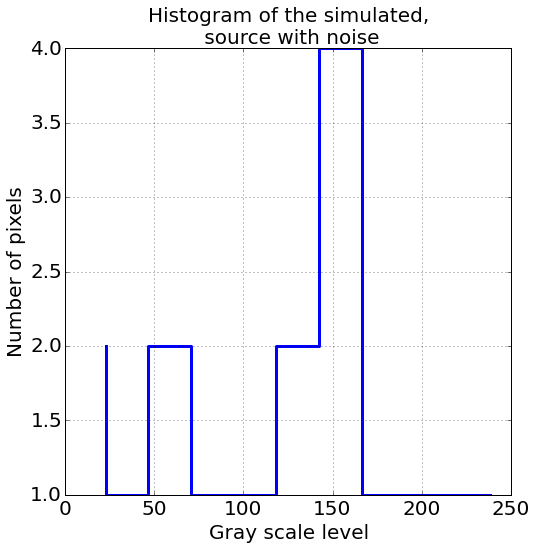

In [8]:
#Reading the image 
canvas = cv2.imread(path_images+'blackImage.jpg', cv2.CV_LOAD_IMAGE_GRAYSCALE)
#properties for the injected source
size = 5
amplitude_source = 255*10
std_source = 3.0
std_noise = np.sqrt(noise_background**2.0 + amplitude_source)
x, y = (width/2,height/2)
#injecting the source
canvas = inject_noisy_gaussian_source(canvas, x,y, size, std_noise, std_source, amplitude_source)
fig = plt.figure(figsize = (8,8))
plt.imshow(canvas, cmap="Greys_r", origin='lower')
plt.title('Image with the injected source', fontsize=18)
plt.xlabel("x (pixels) ", fontsize=20)
plt.ylabel("y (pixels) ", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
#Plotting the histogram of the injected source
injected_source = canvas[int(x-size/2):int(x+size/2), int(y-size/2):int(y+size/2)]
make_histogram(injected_source, 10)

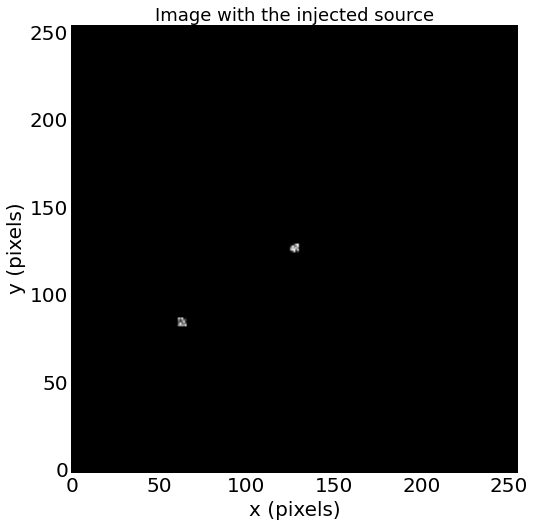

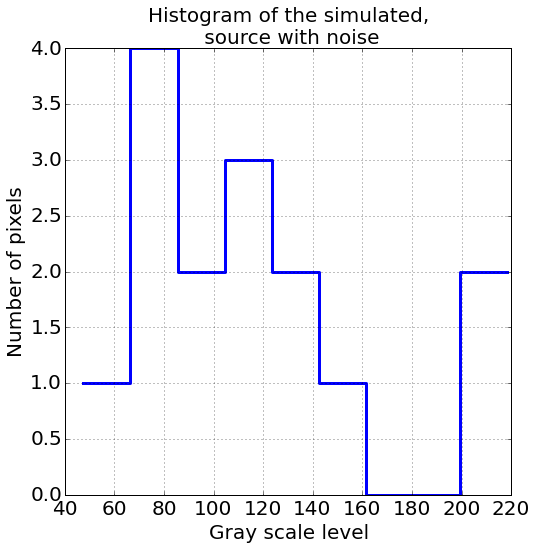

In [9]:
#properties for the injected source
size = 5
amplitude_source = 180*10
std_source = 3.0
std_noise = np.sqrt(noise_background**2.0 + amplitude_source)
x, y = (width/3,height/4)
#injecting the source
canvas = inject_noisy_gaussian_source(canvas, x,y, size, std_noise, std_source, amplitude_source)
#Visualization the image
fig = plt.figure(figsize = (8,8))
plt.imshow(canvas, cmap="Greys_r", origin='lower')
plt.title('Image with the injected source', fontsize=18)
plt.xlabel("x (pixels) ", fontsize=20)
plt.ylabel("y (pixels) ", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
#Plotting the histogram of the injected source
injected_source = canvas[int(x-size/2):int(x+size/2), int(y-size/2):int(y+size/2)]
make_histogram(injected_source, 10)

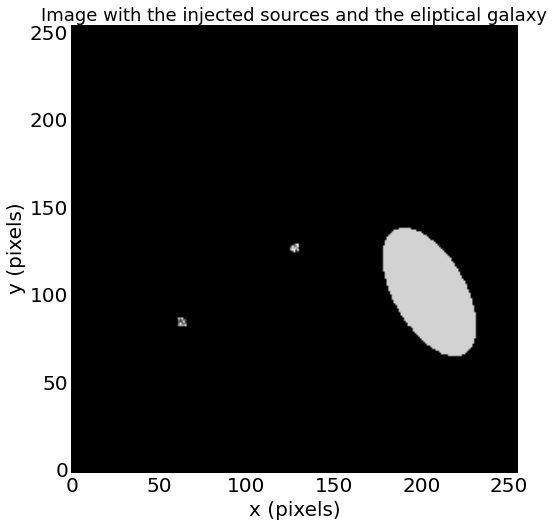

In [10]:
cv2.ellipse(canvas,(int(width*0.8), int(height*0.4)),(20,40),30,0,360,180,-1)
cv2.imwrite(path_images+'truesky_ref.jpg', canvas)
fig = plt.figure(figsize = (8,8))
plt.imshow(canvas, cmap="Greys_r", origin='lower')
plt.title('Image with the injected sources and the eliptical galaxy', fontsize=18)
plt.xlabel("x (pixels) ", fontsize=20)
plt.ylabel("y (pixels) ", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)

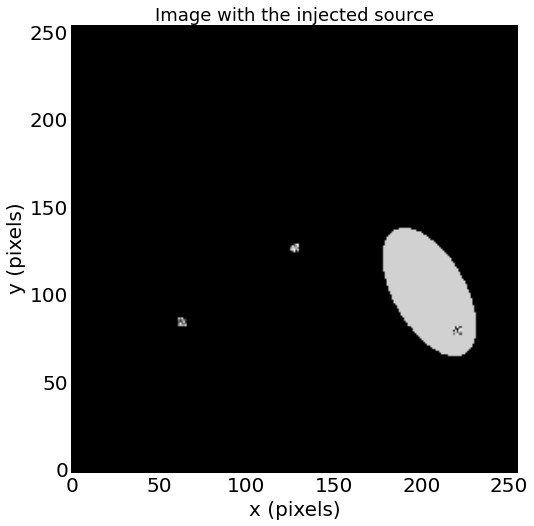

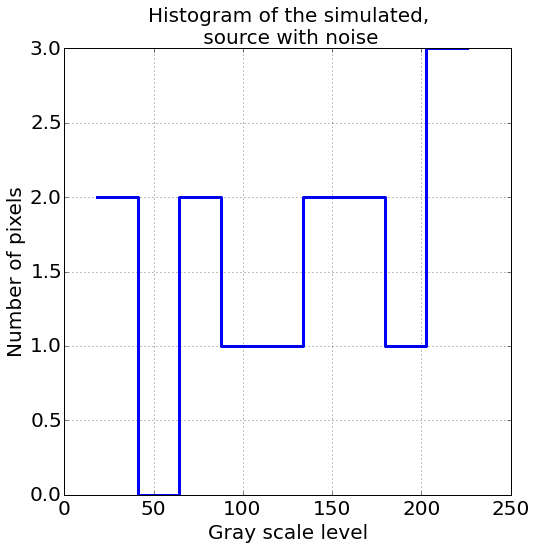

In [11]:
#properties for the injected source
size = 5
amplitude_source = 855*10
std_source = 3.0
std_noise = np.sqrt(noise_background**2.0 + amplitude_source)
x, y = (80,220)
#injecting the source
canvas = inject_noisy_gaussian_source(canvas, x,y, size, std_noise, std_source, amplitude_source)
#Visualization the image
fig = plt.figure(figsize = (8,8))
plt.imshow(canvas, cmap="Greys_r", origin='lower')
plt.title('Image with the injected source', fontsize=18)
plt.xlabel("x (pixels) ", fontsize=20)
plt.ylabel("y (pixels) ", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
#Plotting the histogram of the injected source
injected_source = canvas[int(x-size/2):int(x+size/2), int(y-size/2):int(y+size/2)]
make_histogram(injected_source, 10)

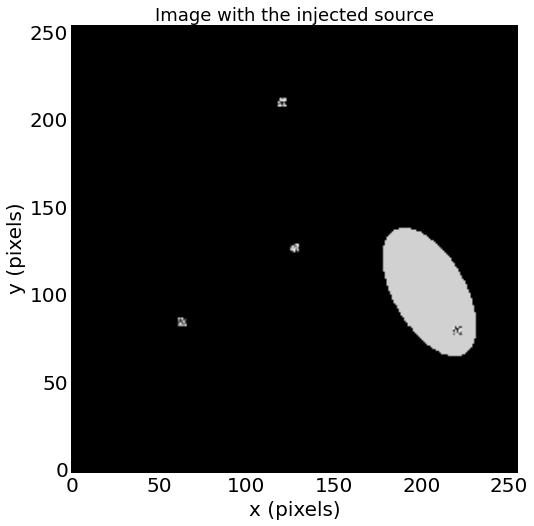

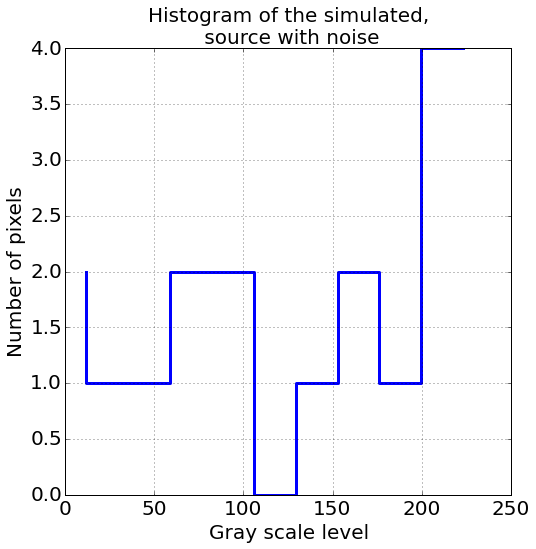

In [12]:
#properties for the injected source
size = 5
amplitude_source = 255*10
std_source = 3.0
std_noise = np.sqrt(noise_background**2.0 + amplitude_source)
x, y = (210,120)
#injecting the source
canvas = inject_noisy_gaussian_source(canvas, x,y, size, std_noise, std_source, amplitude_source)
#Visualization the image
fig = plt.figure(figsize = (8,8))
plt.imshow(canvas, cmap="Greys_r", origin='lower')
plt.title('Image with the injected source', fontsize=18)
plt.xlabel("x (pixels) ", fontsize=20)
plt.ylabel("y (pixels) ", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
#Plotting the histogram of the injected source
injected_source = canvas[int(x-size/2):int(x+size/2), int(y-size/2):int(y+size/2)]
make_histogram(injected_source, 10)

In [13]:
#Writing the image
cv2.imwrite(path_images+'truesky_new.jpg', canvas)

True

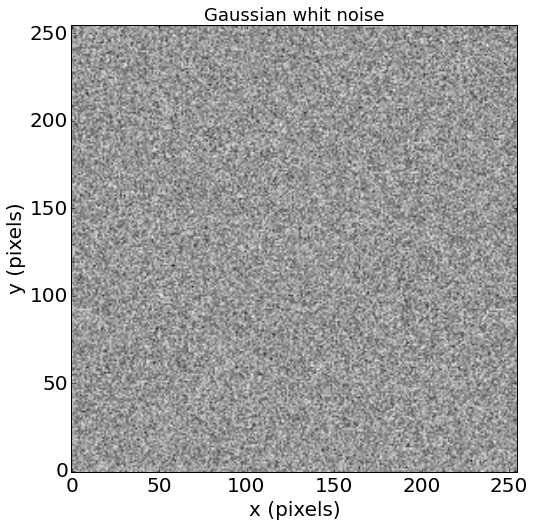

In [14]:
canvas = cv2.imread(path_images+'blackImage.jpg', cv2.CV_LOAD_IMAGE_GRAYSCALE)
row, col = canvas.shape
mean = 0
gauss = np.random.normal(mean, noise_background, (row,col))
gauss = gauss.reshape(row, col)
canvas = canvas + gauss
cv2.imwrite(path_images+'noisy.jpg', canvas)

fig = plt.figure(figsize = (8,8))
plt.imshow(canvas, cmap="Greys_r", origin='lower')
plt.title('Gaussian whit noise', fontsize=18)
plt.xlabel("x (pixels) ", fontsize=20)
plt.ylabel("y (pixels) ", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)

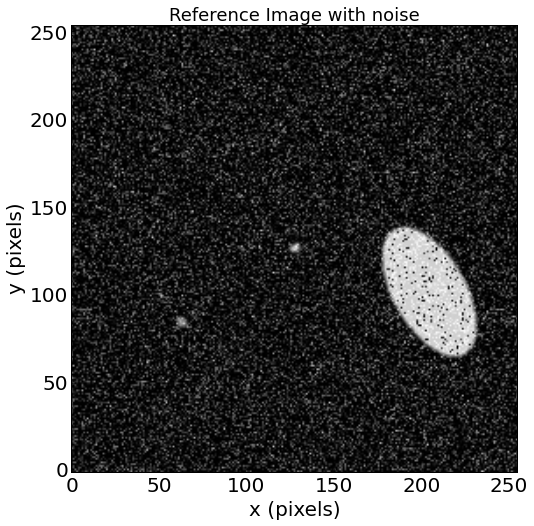

In [15]:
canvas1 = cv2.imread(path_images+'noisy.jpg', cv2.CV_LOAD_IMAGE_GRAYSCALE) 
canvas2 = cv2.imread(path_images+'truesky_ref.jpg', cv2.CV_LOAD_IMAGE_GRAYSCALE)
canvas = cv2.GaussianBlur(canvas2, (3,3), 3, 3)
canvas = canvas + canvas1 
cv2.imwrite(path_images+'ReferenceImage.jpg', canvas)
fig = plt.figure(figsize = (8,8))
plt.imshow(canvas, cmap="Greys_r", origin='lower')
plt.title('Reference Image with noise', fontsize=18)
plt.xlabel("x (pixels) ", fontsize=20)
plt.ylabel("y (pixels) ", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)

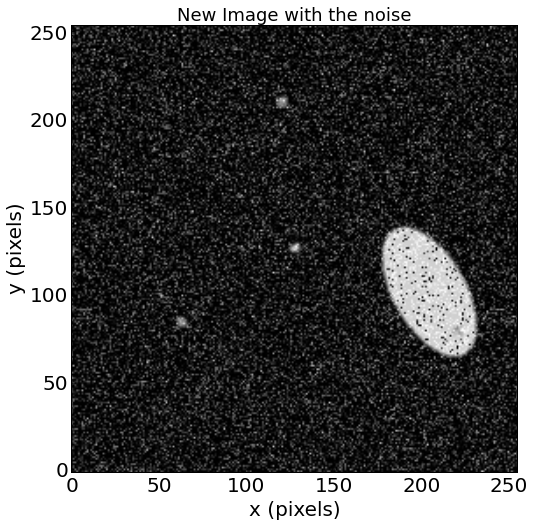

In [16]:
canvas1 = cv2.imread(path_images+'noisy.jpg', cv2.CV_LOAD_IMAGE_GRAYSCALE) 
canvas2 = cv2.imread(path_images+'truesky_new.jpg', cv2.CV_LOAD_IMAGE_GRAYSCALE)
canvas = cv2.GaussianBlur(canvas2, (3,3), 3, 3)
canvas = canvas + canvas1 
cv2.imwrite(path_images+'NewImage.jpg', canvas)
fig = plt.figure(figsize = (8,8))
plt.imshow(canvas, cmap="Greys_r", origin='lower')
plt.title('New Image with the noise', fontsize=18)
plt.xlabel("x (pixels) ", fontsize=20)
plt.ylabel("y (pixels) ", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)